In [1]:
import random
random.randint(0,6)

1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('homeprices.csv')
df.sample(5)

,area,bedrooms,price
0,1056,2,39.07
15,1175,2,42.00
17,1540,3,60.00
11,2785,4,140.00
9,3700,5,167.00


In [4]:
df[['area', 'bedrooms']]

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [5]:
df['area'].max()

3700

In [6]:
from sklearn import preprocessing
px = preprocessing.MinMaxScaler()
py = preprocessing.MinMaxScaler()

scaled_x = px.fit_transform(df.drop("price", axis="columns"))
scaled_y = px.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [7]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_x.shape

(20, 2)

In [9]:
df[['area', 'bedrooms']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
area,1056,2600,1440,1521,1200,1170,2732,3300,1310,3700,1800,2785,1000,1100,2250,1175,1180,1540,2770,800
bedrooms,2,4,3,3,2,2,4,4,3,5,3,4,2,2,3,2,3,3,3,1


                    ( [d, e]        
( [a, b , c] )    *   [f, g]        =  ( [a.d + b.f + c.n, a.e + b.g + c.r] )
              1x3     [n, r] )                                               1x2
                              3x2

In [10]:
m = np.ones(scaled_x.shape[1])
m

array([1., 1.])

In [11]:
res =  np.dot(m, scaled_x.T)
res

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [12]:
scaled_x[5]

array([0.12758621, 0.25      ])

In [126]:
def SGD(x, y_true, epochs, learning_rate=0.000008):
    number_of_features = x.shape[1]
    number_of_samples = x.shape[0]
    w = np.ones(number_of_features)
    b = 0
    loss_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0, number_of_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        w_der = (number_of_features/number_of_samples)*(np.dot(sample_x.T, (y_predicted-sample_y)))
        b_der = (number_of_features/number_of_samples)*(y_predicted - sample_y)
        
        w = w - learning_rate*w_der
        b = b - learning_rate*b_der

        loss = np.square(sample_y - y_predicted)
        
        if i%100 == 0:
            loss_list.append(loss)
            epoch_list.append(i)
    
    return w, b, loss_list, epoch_list

In [127]:
w, b, loss_list, epoch_list = SGD(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 100000)

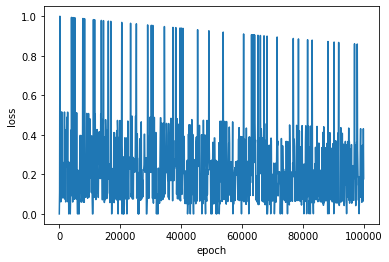

In [129]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list, loss_list)

In [130]:
for i in df.drop('price', axis="columns").columns:
    print(i)

area
bedrooms


In [131]:
re = ["gg", "gsd"]
for i in re:
    print(i)


gg
gsd


In [134]:
def predict(area_value, bedrooms_value, w, b):
    features = [area_value, bedrooms_value]
    feature_names = df.drop('price', axis="columns").columns
    scaled_features = []
    for i in feature_names:
        max = df[str(i)].max()
        min = df[str(i)].min()
        scaled = (features[feature_names.get_loc(i)]-min)*100/(max-min)
        scaled_features.append(scaled)
    for i in range(len(feature_names)):
        y =+ w[i]*scaled_features[i]
    return y + b

In [135]:
predict(2600, 4, w, b)

73.37721648572746